## Saras labb 1.1 

Import the text files

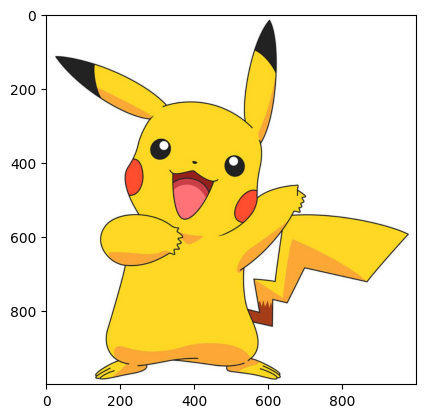

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
img = np.asarray(Image.open('Pikachu.jpg'))
imgplot = plt.imshow(img)


with open("pikachu.txt" , "r") as file:
    pikachu_txt = file.readlines()[1:]  # Skip the first line

with open("pichu.txt", "r") as file:
    pichu_txt = file.readlines()[1:]  # Skip the first line


Parse data

In [2]:
pichu_data = [tuple(map(float, line.strip().replace('(', '').replace(')', '').split(','))) for line in pichu_txt]
pikachu_data = [tuple(map(float, line.strip().replace('(', '').replace(')', '').split(','))) for line in pikachu_txt]

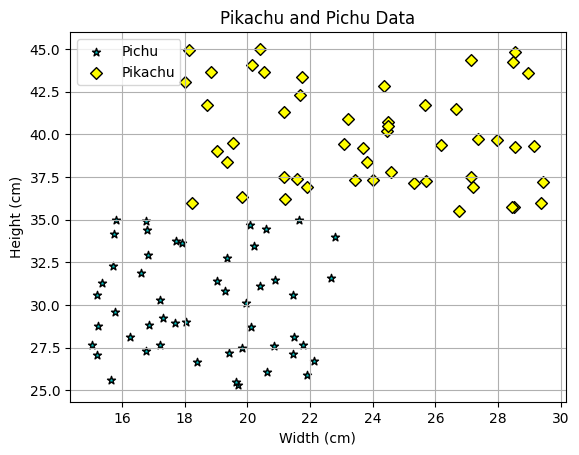

In [3]:
# separate x and y values
pichu_x = [point[0] for point in pichu_data]
pichu_y = [point[1] for point in pichu_data]

pikachu_x = [point[0] for point in pikachu_data]
pikachu_y = [point[1] for point in pikachu_data]

# Plot Pichu data and Pikachu data
plt.scatter(pichu_x, pichu_y, color='c', marker='*',edgecolors='black',label='Pichu')
plt.scatter(pikachu_x, pikachu_y, color='yellow', marker='D',edgecolors='black', label='Pikachu')
plt.xlabel('Width (cm)')
plt.ylabel('Height (cm)')
plt.title('Pikachu and Pichu Data')
plt.legend()
plt.grid(True)
plt.show()

Read the file test data

In [4]:
# Load test points from file
with open("test_points.txt", "r") as file:
    test_points_txt = file.readlines()

# # Convert each row to a tuple of floats and create test_data
test_data = []
for line in test_points_txt:
    values = line.strip().replace('(', '').replace(')', '').split(',')
    for i in range(0, len(values), 2):
        if i + 1 < len(values):
            test_data.append((round(float(values[i]), 2), round(float(values[i + 1]), 2)))


# Print test_data for checking
print(test_data)

[(25.0, 35.0), (15.0, 14.0), (26.0, 30.0), (22.0, 45.0)]


Plotta Test_data, Pikachu_data, Pichu_data
* Function to calculate Euclidean distance between points
* Function to calculate the distance between the test points and Pikachu/Pichu points
* Calculate distance between Pikachu and Pichu


Distance between test point 1 och pikachu 1: 12.09
Distance between test point 1 och pikachu 2: 6.70
Distance between test point 1 och pikachu 3: 4.54
Distance between test point 1 och pikachu 4: 5.21
Distance between test point 1 och pikachu 5: 3.99
Distance between test point 1 och pikachu 6: 2.35
Distance between test point 1 och pikachu 7: 6.59
Distance between test point 1 och pikachu 8: 6.15
Distance between test point 1 och pikachu 9: 2.78
Distance between test point 1 och pikachu 10: 4.96
Distance between test point 1 och pikachu 11: 3.58
Distance between test point 1 och pikachu 12: 7.39
Distance between test point 1 och pikachu 13: 2.50
Distance between test point 1 och pikachu 14: 10.27
Distance between test point 1 och pikachu 15: 9.46
Distance between test point 1 och pikachu 16: 3.52
Distance between test point 1 och pikachu 17: 4.17
Distance between test point 1 och pikachu 18: 6.72
Distance between test point 1 och pikachu 19: 2.16
Distance between test point 1 och pika

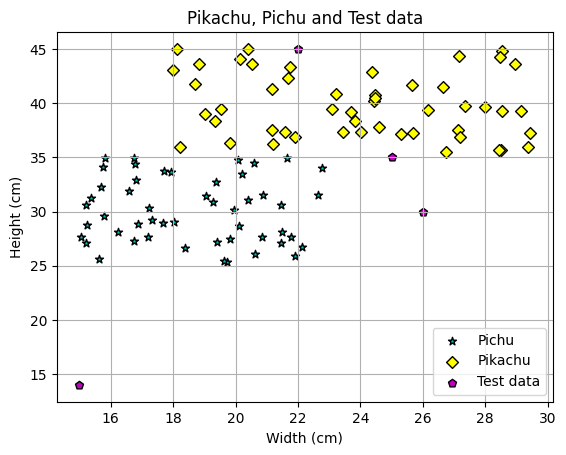

In [5]:
# Function to calculate Euclidean distance between points
def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Function to calculate the distance between the test points and Pikachu/Pichu points
def calculate_distances(test_data, pikachu_data, pichu_data):
    distances = []
    for test_point in test_data:
        test_distances_pikachu = []
        test_distances_pichu = []
        for pikachu_point in pikachu_data:
            distance = euclidean_distance(test_point, pikachu_point)
            test_distances_pikachu.append(distance)
        for pichu_point in pichu_data:
            distance = euclidean_distance(test_point, pichu_point)
            test_distances_pichu.append(distance)
        distances.append((test_distances_pikachu, test_distances_pichu))
    return distances

# Calculate distance between Pikachu and Pichu
distances = calculate_distances(test_data, pikachu_data, pichu_data)

# Print the distances
for i, (pikachu_distances, pichu_distances) in enumerate(distances):
    for j, distance in enumerate(pikachu_distances):
        print(f"Distance between test point {i+1} och pikachu {j+1}: {distance:.2f}")
    for j, distance in enumerate(pichu_distances):
        print(f"Distance between test point{i+1} och pichu {j+1}: {distance:.2f}")

# Plot Pichu Pikachu and test data points
pichu_x = [point[0] for point in pichu_data]
pichu_y = [point[1] for point in pichu_data]
pikachu_x = [point[0] for point in pikachu_data]
pikachu_y = [point[1] for point in pikachu_data]
test_data_x = [point[0] for point in test_data]
test_data_y = [point[1] for point in test_data]

plt.scatter(pichu_x, pichu_y, color='c', marker='*',edgecolors='black', label='Pichu')
plt.scatter(pikachu_x, pikachu_y, color='yellow', marker='D',edgecolors='black', label='Pikachu')
plt.scatter(test_data_x, test_data_y, color='m', marker='p',edgecolors='black',label='Test data')

plt.xlabel('Width (cm)')
plt.ylabel('Height (cm)')
plt.title('Pikachu, Pichu and Test data')
plt.legend()
plt.grid(True)
plt.show()

Decision tree classifier

Tests the test data if it should be classified as Pichu or Pikachu

In [6]:
# Calculate and classify test points
classifications = []
for pikachu_distances, pichu_distances in distances:
    min_pikachu_distance = min(pikachu_distances)
    min_pichu_distance = min(pichu_distances)
    
    if min_pichu_distance < min_pikachu_distance:
        classifications.append("Pichu")
    else:
        classifications.append("Pikachu")

# Print classifications for the test points
for i, classification in enumerate(classifications):
    print(f"Test point {i+1} classified as: {classification}")


Test point 1 classified as: Pikachu
Test point 2 classified as: Pichu
Test point 3 classified as: Pichu
Test point 4 classified as: Pikachu


Invite the user to test whether they have caught a Pichu or a Pikachu

In [7]:
from collections import Counter
# Funktion för att klassificera en testpunkt baserat på majoritetsklassen hos de närmaste punkterna
def find_nearest_points(test_point, all_points, k=5):
    distances = [(euclidean_distance(test_point, point), point) for point in all_points]
    distances.sort()
    return [point for (_, point) in distances[:k]]

# Funktion för att klassificera en testpunkt baserat på majoritetsklassen hos de närmaste punkterna
def classify_point(test_point, pikachu_data, pichu_data, k=5):
    nearest_pikachu = find_nearest_points(test_point, pikachu_data, k)
    nearest_pichu = find_nearest_points(test_point, pichu_data, k)
    
    # Skapa en räkne för varje klass
    pikachu_counter = Counter(nearest_pikachu)
    pichu_counter = Counter(nearest_pichu)
    
    # Hitta den mest förekommande klassen
    most_common_pikachu = pikachu_counter.most_common(1)
    most_common_pichu = pichu_counter.most_common(1)
    
    # Avgör majoritetsklassen
    if most_common_pikachu[0][1] > most_common_pichu[0][1]:
        return "Pikachu"
    else:
        return "Pichu"


In [8]:
print("Welcome to Sara's Pokemon classifier! Congratulations on the catch!")
print("Enter the width and height of your Pokemon in centimeters and I'll tell you if it's classified as a Pichu or a Pikachu!\n")

while True:
    try:
        width_str = input(f"Enter the width of your Pokemon in centimeters: ")
        height_str = input(f"Enter the height of your Pokemon in centimeters: ")
        # Replace comma with period to enable conversion to floating point
        width = float(width_str.replace(',', '.'))
        height = float(height_str.replace(',', '.'))
        if width < 0 or height < 0:
            raise ValueError ("Sorry, width and height must be positive numbers.")
        break 
    except ValueError:
        print("Sorry, this is an incorrect input :( Please enter a valid numeric value for width and height.\n")
        
#Print the classification
print(f"The Pokemon that you have captured width is {width} cm and height {height} cm is classified as: {classification}!!")

print("\n In a world of towering mountains and deep forests, where streams of mystique flow freely and adventure awaits around every corner, lies the realm of Pokémon! A world where friendship is stronger than steel and courage is mightier than any storm. With pockets full of dreams and hearts brimming with valor, we embark on our epic Pokémon journey, ready to capture memories, challenge champions, and prove that we are the very best - like no one ever was! So gear up, don your Pokémon cap, and set forth, for the adventure awaits and it's time to catch 'em all!")

print("For in the world of Pokémon, there's no such thing as impossible - just endless possibilities and an eternal sense of adventure!")

print("\n Don't forget, you gotta catch 'em all!")


Welcome to Sara's Pokemon classifier! Congratulations on the catch!
Enter the width and height of your Pokemon in centimeters and I'll tell you if it's classified as a Pichu or a Pikachu!

The Pokemon that you have captured width is 55.0 cm and height 33.0 cm is classified as: Pikachu!!

 In a world of towering mountains and deep forests, where streams of mystique flow freely and adventure awaits around every corner, lies the realm of Pokémon! A world where friendship is stronger than steel and courage is mightier than any storm. With pockets full of dreams and hearts brimming with valor, we embark on our epic Pokémon journey, ready to capture memories, challenge champions, and prove that we are the very best - like no one ever was! So gear up, don your Pokémon cap, and set forth, for the adventure awaits and it's time to catch 'em all!
For in the world of Pokémon, there's no such thing as impossible - just endless possibilities and an eternal sense of adventure!

 Don't forget, you go

 Calculate the five closest points

In [9]:
from collections import Counter
# Funktion för att klassificera en testpunkt baserat på majoritetsklassen hos de närmaste punkterna
def find_nearest_points(test_point, all_points, k=5):
    distances = [(euclidean_distance(test_point, point), point) for point in all_points]
    distances.sort()
    return [point for (_, point) in distances[:k]]

# Funktion för att klassificera en testpunkt baserat på majoritetsklassen hos de närmaste punkterna
def classify_point(test_point, pikachu_data, pichu_data, k=5):
    nearest_pikachu = find_nearest_points(test_point, pikachu_data, k)
    nearest_pichu = find_nearest_points(test_point, pichu_data, k)
    
    # Skapa en räkne för varje klass
    pikachu_counter = Counter(nearest_pikachu)
    pichu_counter = Counter(nearest_pichu)
    
    # Hitta den mest förekommande klassen
    most_common_pikachu = pikachu_counter.most_common(1)
    most_common_pichu = pichu_counter.most_common(1)
    
    # Avgör majoritetsklassen
    if most_common_pikachu[0][1] > most_common_pichu[0][1]:
        return "Pikachu"
    else:
        return "Pichu"
